Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


E:\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


E:\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 53/189 ━━━━━━━━━━━━━━━━━━━━ 1:39 732ms/step - accuracy: 0.6326 - loss: 0.6066

E:\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 159s 794ms/step - accuracy: 0.7643 - loss: 0.4569 - val_accuracy: 0.9119 - val_loss: 0.2736
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 31s 159ms/step - accuracy: 0.9051 - loss: 0.2431 - val_accuracy: 0.9285 - val_loss: 0.1948
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 60s 317ms/step - accuracy: 0.9374 - loss: 0.1704 - val_accuracy: 0.9424 - val_loss: 0.1725
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.9504 - loss: 0.1432 - val_accuracy: 0.9536 - val_loss: 0.1330
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 213ms/step - accuracy: 0.9567 - loss: 0.1225 - val_accuracy: 0.9351 - val_loss: 0.1885
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 26s 137ms/step - accuracy: 0.9679 - loss: 0.0863 - val_accuracy: 0.9623 - val_loss: 0.1316
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.9705 - loss: 0.0820 - val_accuracy: 0.9596 - val_loss: 0.1252
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 34s 177ms/step - accuracy: 0.9827 - loss: 0.0568 - va

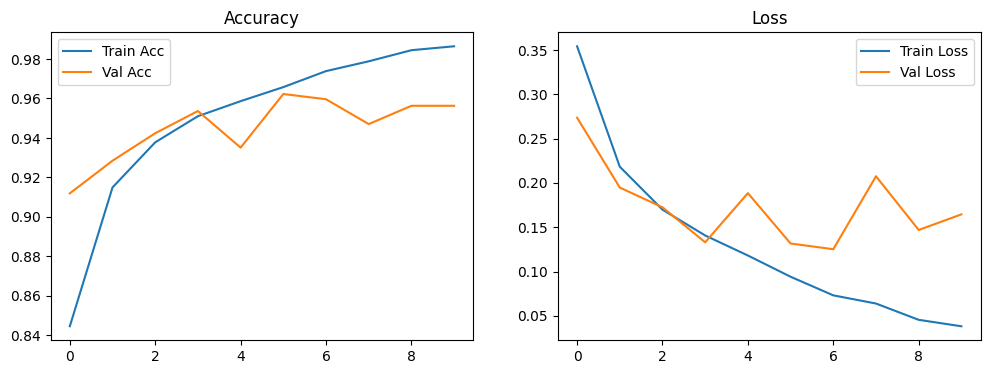

In [2]:
# Face Mask Detection using CNN
# MD ASRAF ALI

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Set path to dataset (update path as needed)
dataset_path = "data"

# Image Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Save model
model.save("face_mask_model.h5")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [1]:
pip install opencv-python tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load model
model = load_model("face_mask_model.h5")
labels = ["without_mask", "with_mask"]

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize and normalize
    img = cv2.resize(frame, (100, 100))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Predict
    result = model.predict(img)
    label = labels[int(result[0][0] > 0.5)]
    
    # Display
    cv2.putText(frame, f"Prediction: {label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    cv2.imshow("Face Mask Detection", frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━